# <b>pie<b>

This section describes various options available for pie charts in **fivecentplots**

See the full API https://endangeredoxen.github.io/fivecentplots/0.6.0/api/pie.html#pie

## Setup

Import packages

In [1]:
import fivecentplots as fcp
import pandas as pd
import numpy as np
from pathlib import Path

Read some fake bar chart data to use in the pie chart:

In [2]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_bar.csv')
df.loc[df.pH < 0, 'pH'] = -df.pH
df.head()

,Liquid,pH,Measurement,T [C]
0,Lemon juice,2.4,A,25
1,Orange juice,3.5,A,25
2,Battery acid,1.0,A,25
3,Bottled water,6.7,A,25
4,Coke,3.0,A,25


Optionally set the design theme (skipping here and using default):

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## Basic plot

Consider a DataFrame that contains several sets of measured pH data for various liquids.  First, we filter to plot only one set of measured data:

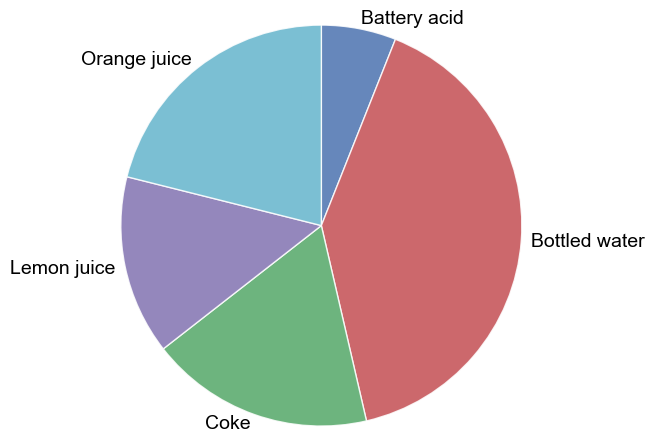

In [4]:
fcp.pie(df, x='Liquid', y='pH', filter='Measurement=="A" & T [C]==25')

The size of the pie chart is controlled by the keyword `pie_radius` (or shorthand `radius`):

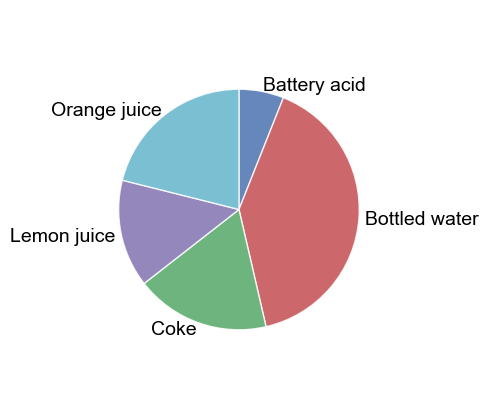

In [5]:
fcp.pie(df, x='Liquid', y='pH', filter='Measurement=="A" & T [C]==25', pie_radius=0.6)

## Donut

We can turn our pie chart into a donut chart by using the keyword `pie_inner_radius` (or shorthand `innerradius`).  This command is akin to thee `width` attribute in matplotlibs `wedgeprops`.  The inner radius should be lower than the main `radius` parameter, which is set to 1 by default. 

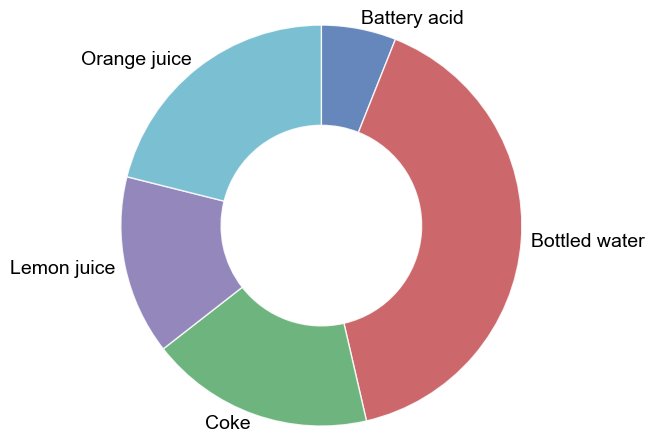

In [6]:
fcp.pie(df, x='Liquid', y='pH', filter='Measurement=="A" & T [C]==25', inner_radius=0.5)

<div class="admonition note">
<p class="admonition-title"></p>
<p>Note that if `pie_inner_radius` is not explicitly set by keyword or in a theme file, it will be set to equal `radius`.  Be mindful that if you have `pie_inner_radius` set in a custom theme file and then change only `pie_radius` you will get an unintended result! </p>
</div>

## Grouping

Like other plot types, pie charts can grouped in various ways to provide further insight into the data set.  This includes legends, row/col, and wrap plots.  

### Legend

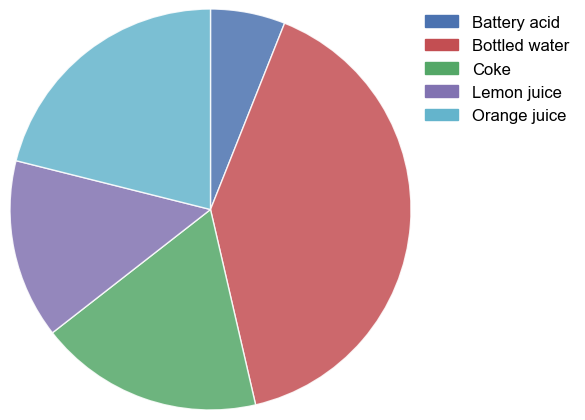

In [7]:
fcp.pie(df, x='Liquid', y='pH', filter='Measurement=="A" & T [C]==25', legend=True)

### Row/column plot

We can separate different conditions using row/col plots as shown below:

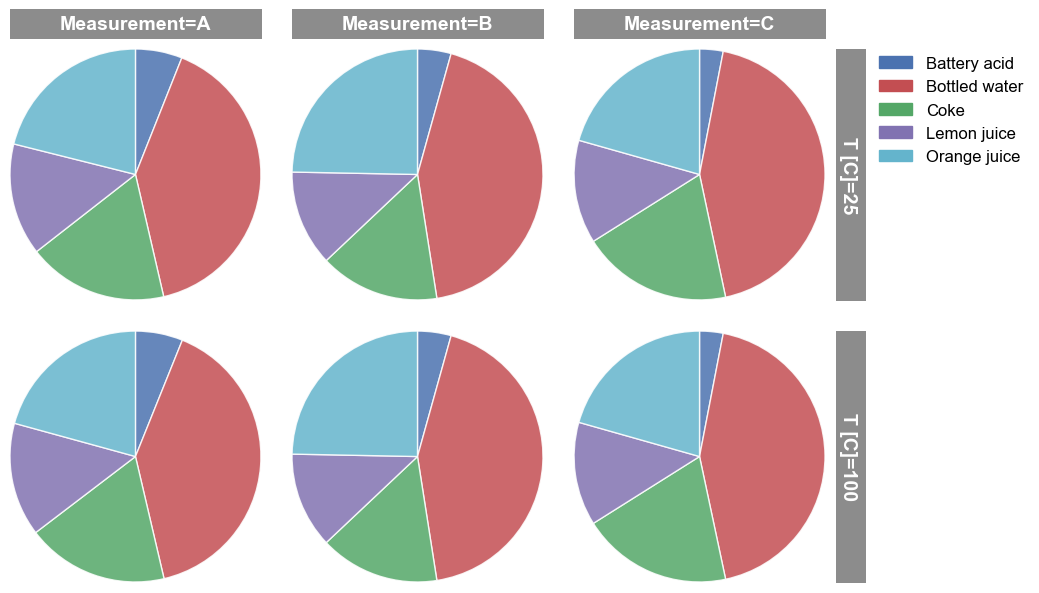

In [8]:
fcp.pie(df, x='Liquid', y='pH', col='Measurement', row='T [C]', legend=True, ax_size=[250, 250])

### Wrap plot

Alternatively, we can use a `wrap` plot to visualize:

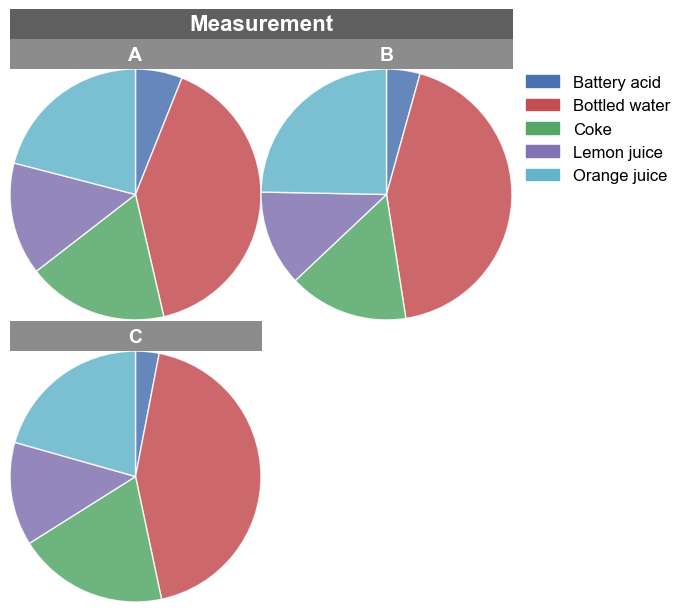

In [9]:
fcp.pie(df, x='Liquid', y='pH', wrap='Measurement', ax_size=[250, 250], legend=True)

## Other options

### Wedge labels

Wedge labels can be positioned relative to the center of the pie using keyword `pie_label_distance`.  All other font parameters are controlled using `pie_font_xxx` keywords (or the shorthand versions with drop "pie_").  The position is based on a bisection line through the center of the pie chart and the wedge.

We can also change the rotation of the labels to follow the bisection line using keyword `pie_rotate_labels` (or `rotate_labels`).

    - font_color


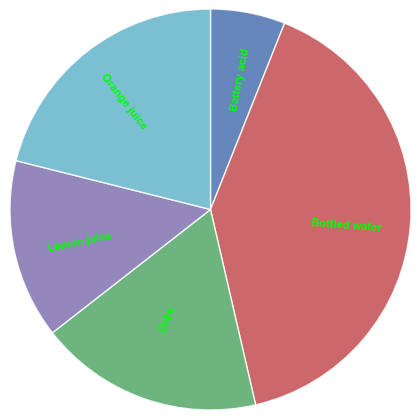

In [10]:
fcp.pie(df, x='Liquid', y='pH', filter='Measurement=="A" & T [C]==25', pie_label_distance=0.5, pie_font_size=8, 
        pie_font_weight='heavy', font_color='#00FF00', rotate_labels=True)

### Labeled percents

Using the keyword `pie_percents=True` (or shorthand `percents`), we can label each pie wedge with the percentage for that category:

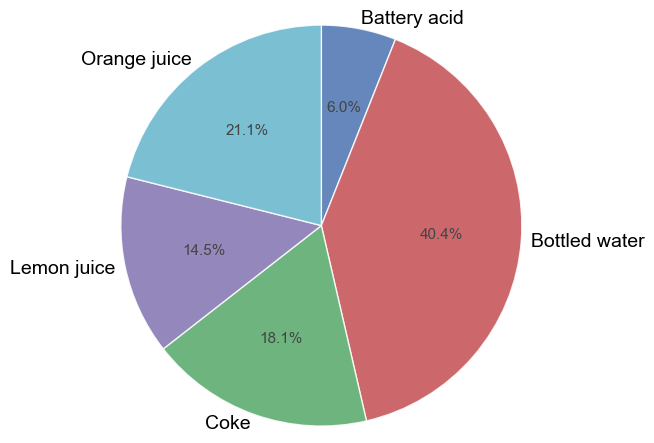

In [11]:
fcp.pie(df, x='Liquid', y='pH', filter='Measurement=="A" & T [C]==25', pie_percents=True)

We can style the percent labels using any combination of the following keywords (shortcuts in parentheses):

* pie_percents_distance (percents_distance)
* pie_percents_font_color (percents_font_color)
* pie_percents_font_size (percents_font_size)
* pie_percents_font_weight (percents_font_weight)

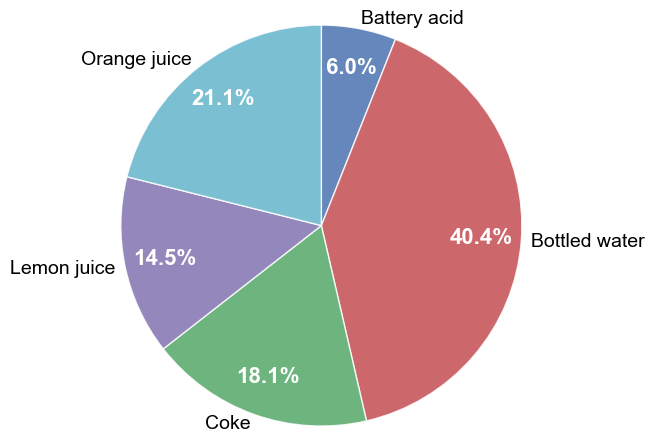

In [12]:
fcp.pie(df, x='Liquid', y='pH', filter='Measurement=="A" & T [C]==25', pie_percents=True,
        percents_distance=0.8, percents_font_color='#ffffff', percents_font_size=16, percents_font_weight='bold')

### Explode

To emphasize a particular wedge in the pie chart, use the `pie_explode` (or `explode`) keyword. This keyword takes a list of offset values for the wedge(s) that is(are) exploded.  The `explode` list is ordered alphabetically and you only need to define up to the last wedge that will be exploded.  For example, if we want to emphasize the first wedge ("Battery acid") we use:

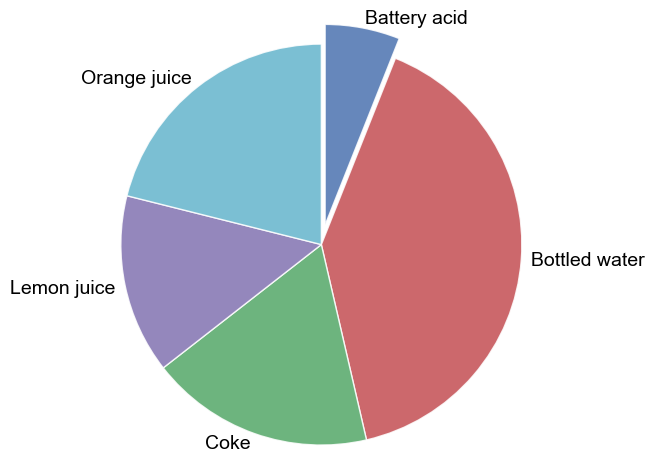

In [13]:
fcp.pie(df, x='Liquid', y='pH', filter='Measurement=="A" & T [C]==25', explode=[0.1])

However, if we want to explode the third ("Coke") and fifth ("Orange juice") wedges and explode them different amounts, we use:

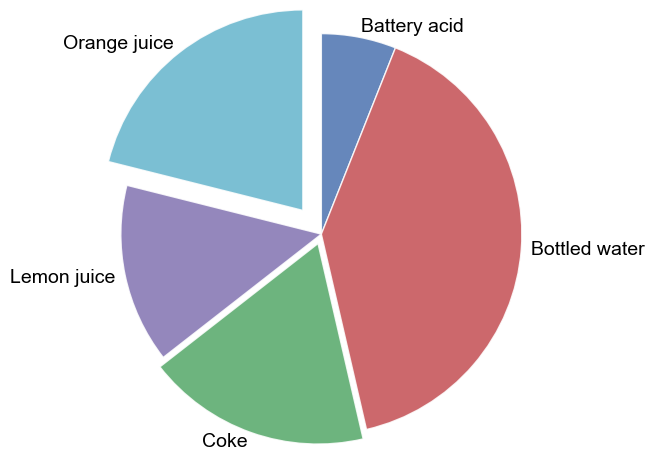

In [14]:
fcp.pie(df, x='Liquid', y='pH', filter='Measurement=="A" & T [C]==25', explode=[0, 0, 0.05, 0, 0.15])

### Shadow

We can apply a really ugly shadow to the pie using keyword `pie_shadow` (or `shadow`).  Please don't ever use this feature unless you are intentionally wanting a bad-looking plot.

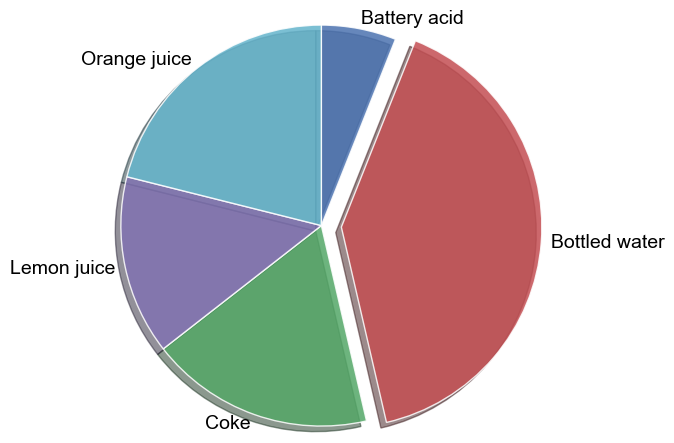

In [15]:
fcp.pie(df, x='Liquid', y='pH', filter='Measurement=="A" & T [C]==25', explode=(0,0.1), shadow=True)

### Start angle

By default, the pie wedges will start referenced from 12 o'clock and be positioned in a clockwise fashion.  You can change the starting position using keyword `pie_start_angle` (or `start_angle`) which defaults to 90.

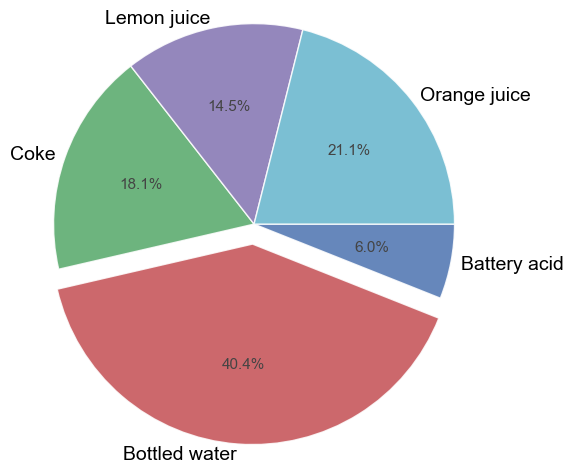

In [16]:
fcp.pie(df, x='Liquid', y='pH', filter='Measurement=="A" & T [C]==25', explode=(0,0.1), start_angle=0, percents=True)

### Counter clockwise

We can force pie wedges to be arranged in a counter-clockwise fashion using keyword `pie_counter_clock` (or `counter_clock`):

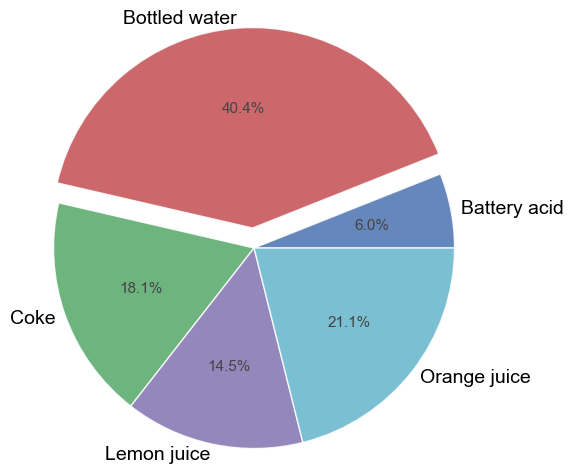

In [17]:
fcp.pie(df, x='Liquid', y='pH', filter='Measurement=="A" & T [C]==25', explode=(0,0.1), start_angle=0, percents=True, counter_clock=True)

## Colors

We can control the wedge colors using the following keywords (shorthand in parentheses):

* pie_colors (colors)
* pie_edge_color (edge_color)
* pie_edge_style (edge_style)
* pie_edge_width (edge_width)

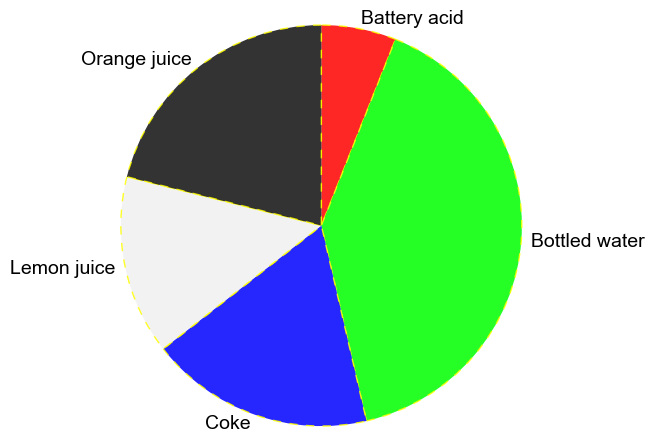

In [18]:
fcp.pie(df, x='Liquid', y='pH', filter='Measurement=="A" & T [C]==25', 
        colors=['#FF0000', '#00FF00', '#0000FF', '#F0F0F0', '#0F0F0F'], 
        pie_edge_color='#FFFF00', pie_edge_style='--', pie_edge_width=3)

Looks like trash...yay!